Index(['value'], dtype='object')


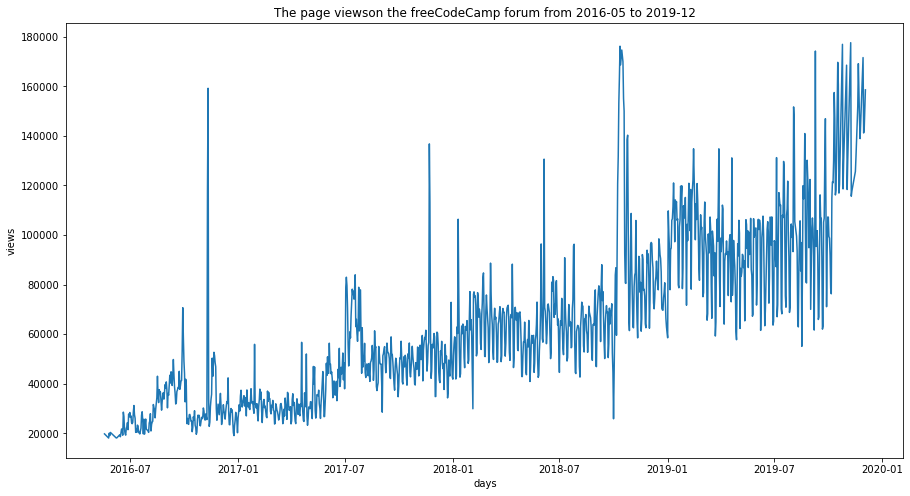

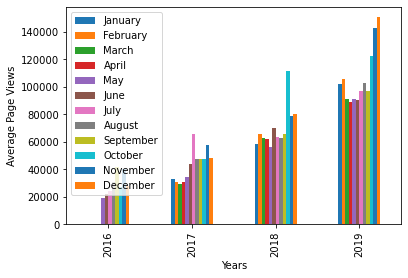

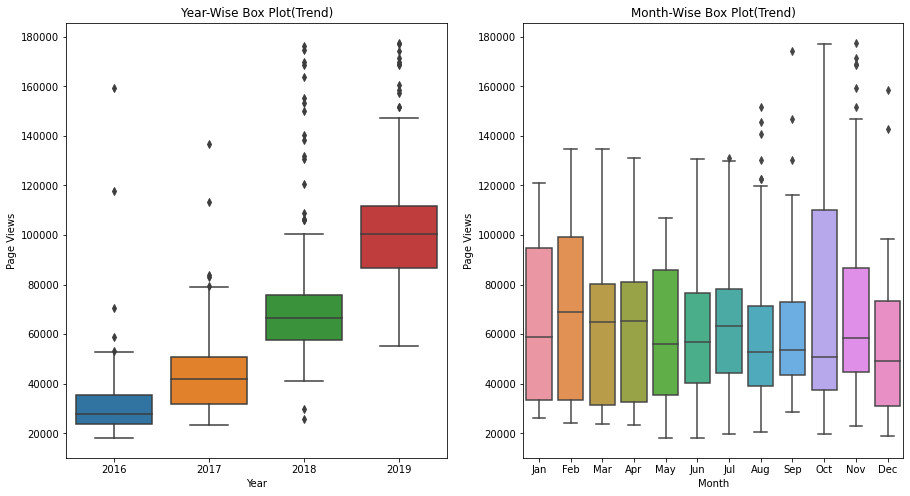

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("C:/Users/DJEF/Downloads/fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')
print(df.columns)

# Clean data
df = df[
    (df.value >= df.value.quantile(0.025))&
    (df.value <= df.value.quantile(0.975))
]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(df.index, df['value'])
    ax.set_title('The page viewson the freeCodeCamp forum from 2016-05 to 2019-12')
    ax.set_xlabel('days')
    ax.set_ylabel('views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy(deep=True)
    
    df_bar['year'] = df.index.year
    df_bar['month'] = df.index.month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
 
    fig = df_bar.plot.bar(legend=True, ylabel='Average Page Views', xlabel='Years').figure
    plt.legend(['January','February','March','April','May','June','July','August','September','October','November','December'])
    
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['month_num'] = df_box['date'].dt.month 
    df_box = df_box.sort_values('month_num')
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
    ax[0] = sns.boxplot(x=df_box.year, y=df_box.value, ax=ax[0])
    ax[1] = sns.boxplot(x=df_box.month, y=df_box.value, ax=ax[1])
    
    ax[1].set_title('Month-Wise Box Plot(Trend)')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel('Page Views')
    
    ax[0].set_title('Year-Wise Box Plot(Trend)')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Page Views')
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
if __name__ == '__main__':
    draw_line_plot()
    draw_bar_plot()
    draw_box_plot()